In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from helper import plot_decision_regions

In [2]:
# load iris dataset
iris = datasets.load_iris()

# assign matrix X and vector y
X = iris.data[:, [2, 3]]
y = iris.target

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# initialize and fit object
sc = StandardScaler()
sc.fit(X_train)

# standardize features
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# recombine X and y
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Support Vector Machines

In [3]:
# import support vector machine model
from sklearn.svm import SVC

# initialize and fit support vector machine model
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

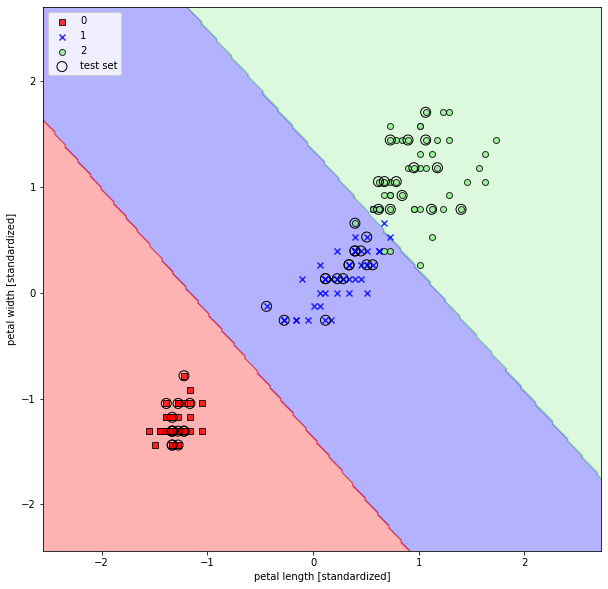

In [4]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Kernel SVMs

In [5]:
# create XOR dataset with 200 samples - 100 labeled `1`, 100 labeled `-1`
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

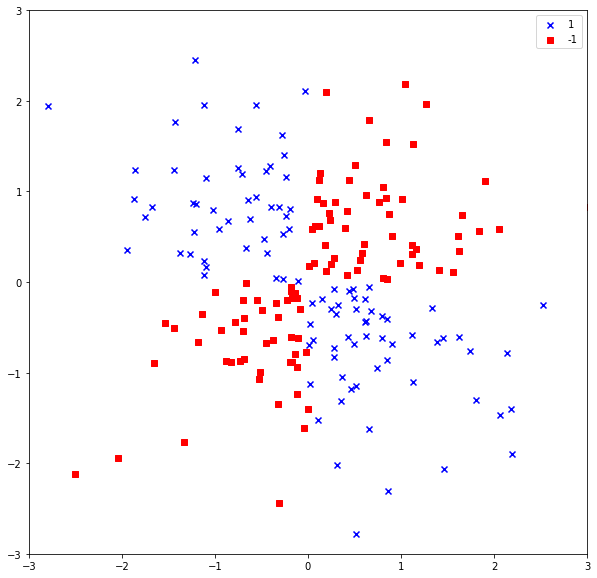

In [6]:
# create scatter plot to show XOR dataset
plt.figure(figsize=(10, 10))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

In [7]:
# initialize and fit kernel support vector machine model to XOR data
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

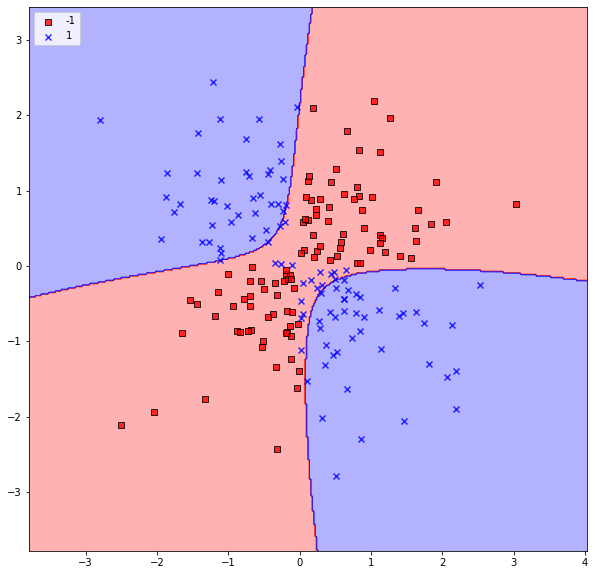

In [8]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [9]:
# initialize and fit kernel svm to Iris
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

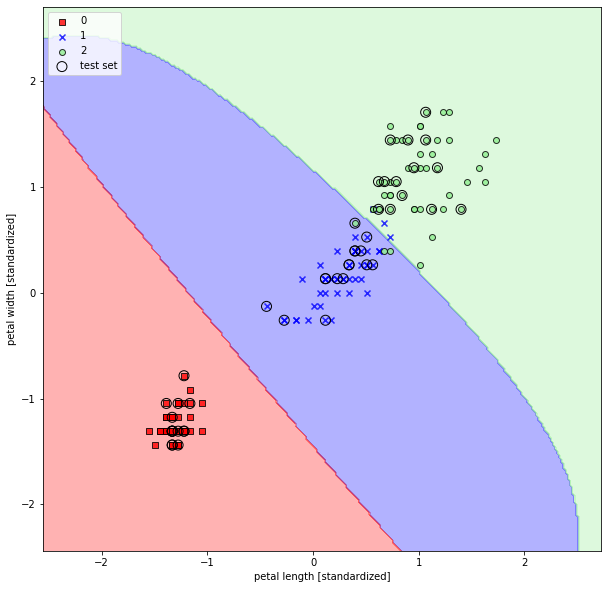

In [10]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_combined_std, 
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Decision Trees

In [11]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)


def error(p):
    return 1 - np.max([p, 1 - p])

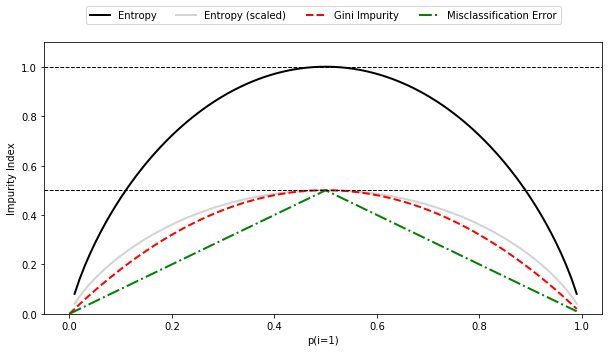

In [12]:
x = np.arange(0.0, 1.0, 0.01)

gini = gini(x)                                     # Calculate Gini impurity
ent = [entropy(p) if p != 0 else None for p in x]  # Calculate entropy
sc_ent = [e * 0.5 if e else None for e in ent]     # Calculate scaled entropy (e/2)
err = [error(i) for i in x]                        # Calculate classification error

# Plot impurity indices
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
for i, lab, ls, c, in zip(
    [ent, sc_ent, gini, err],
    ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
    ['-', '-', '--', '-.'],
    ['black', 'lightgray', 'red', 'green', 'cyan']
):
    line = ax.plot(x, i, label=lab, 
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [13]:
# import decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

# initialize and fit decision tree classifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

# recombine X and y
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

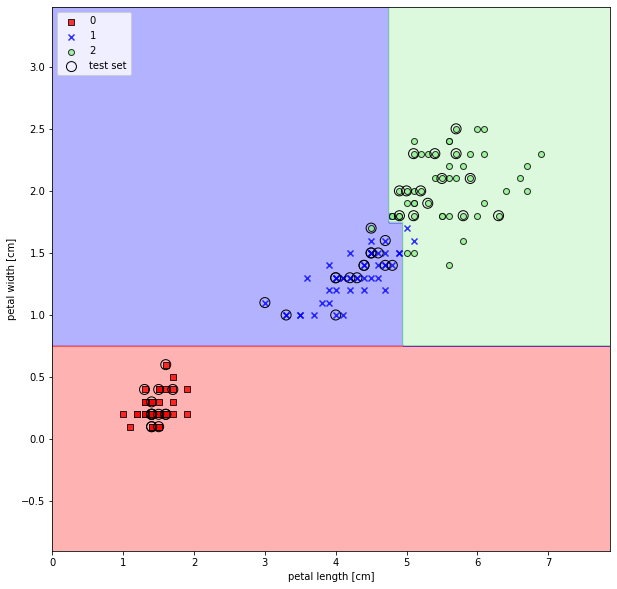

In [14]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [15]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
)

graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydotplus'

Open the file `tree.png` to see your decision tree!

# Random Forests

In [16]:
from sklearn.ensemble import RandomForestClassifier

# initialize and fit random forest classifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

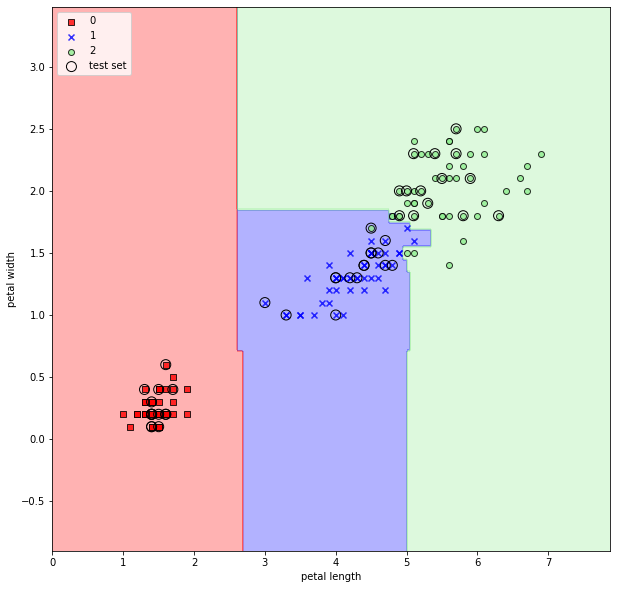

In [17]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# k-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# initialize and fit kNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

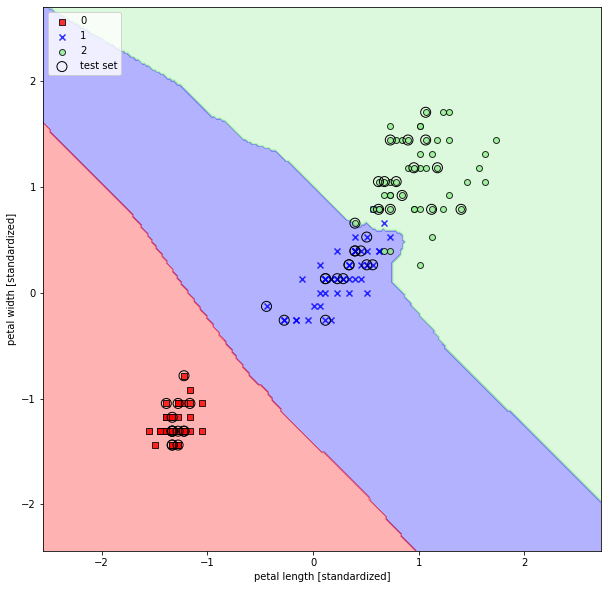

In [19]:
# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()